<a href="https://colab.research.google.com/github/a798645635/CADD/blob/main/SVM_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,LeaveOneOut,cross_val_score
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,make_scorer,matthews_corrcoef
from sklearn.metrics import confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import matplotlib
import copy
import joblib
from typing import List, Any
from mpl_toolkits.mplot3d import Axes3D

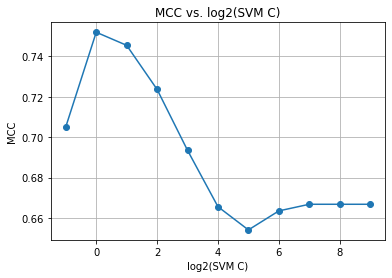

In [ ]:

# Read training set and test set data
train_data_1 = pd.read_csv(r"")
test_data_1 = pd.read_csv(r"")

columns_backward=-3
# Set the range of log2(C) values and gamma values
log2C_values = range(-1,10)
C_values = [2 ** i for i in log2C_values]
gamma = 0.125

# Initialize lists to store log2(C) values and corresponding MCC scores
log2C_list = []
mcc_list = []
l=[2**i for i in range(0,10)]

random_state=100

for log2C in log2C_values:
    C = 2 ** log2C  

    # Create SVM classifier object
    classifier = svm.SVC(C=C, gamma=gamma,random_state=random_state)
    train_data_1_random = train_data_1.sample(frac=1, random_state=random_state)
    test_data_1_random = test_data_1.sample(frac=1, random_state=random_state)
    # 获取训练集和测试集数据
    train_x = train_data_1_random.iloc[:, :columns_backward]
    train_y = train_data_1_random['y']
    test_x = test_data_1_random.iloc[:, :columns_backward]
    test_y = test_data_1_random['y']

    # 使用训练集训练分类器
    classifier.fit(train_x, train_y)

    # 使用测试集进行预测
    y_pred = classifier.predict(test_x)

    # 计算MCC值
    mcc = metrics.matthews_corrcoef(test_y, y_pred)

    # 将log2(C)值和对应的MCC添加到列表中
    log2C_list.append(log2C)
    mcc_list.append(mcc)

# 绘制log2(C)值与MCC的关系图
plt.plot(log2C_list, mcc_list, marker='o')
plt.xlabel('log2(SVM C)')
plt.ylabel('MCC')
plt.title('MCC vs. log2(SVM C)')
plt.grid(True)
plt.show()



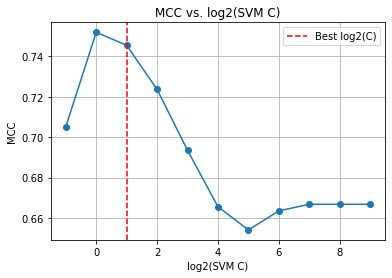

In [ ]:

columns_backward = -3
log2C_values = range(-1, 10)
C_values = [2 ** i for i in log2C_values]
gamma = 0.125

log2C_list = []
mcc_list = []

random_state = 100

for log2C in log2C_values:
    C = 2 ** log2C

    classifier = svm.SVC(C=C, gamma=gamma,  random_state=random_state)
    train_data_1_random = train_data_1.sample(frac=1, random_state=random_state)
    test_data_1_random = test_data_1.sample(frac=1, random_state=random_state)

    train_x = train_data_1_random.iloc[:, :columns_backward]
    train_y = train_data_1_random['y']
    test_x = test_data_1_random.iloc[:, :columns_backward]
    test_y = test_data_1_random['y']

    classifier.fit(train_x, train_y)
    y_pred = classifier.predict(test_x)
    mcc = metrics.matthews_corrcoef(test_y, y_pred)

    log2C_list.append(log2C)
    mcc_list.append(mcc)

# 执行交叉验证选择最佳C值
svm_parameters = {'C': C_values}
scorer = metrics.make_scorer(metrics.matthews_corrcoef, greater_is_better=True)
clf = GridSearchCV(classifier, svm_parameters, scoring=scorer, n_jobs=-1, cv=10)
clf.fit(train_x, train_y)

best_log2C = np.log2(clf.best_params_['C'])  # 获取最佳log2(C)值
best_mcc = clf.best_score_  # 获取最佳MCC值

plt.plot(log2C_list, mcc_list, marker='o')
plt.axvline(x=best_log2C, color='r', linestyle='--', label='Best log2(C)')
plt.xlabel('log2(SVM C)')
plt.ylabel('MCC')
plt.title('MCC vs. log2(SVM C)')
plt.grid(True)
plt.legend()
plt.show()


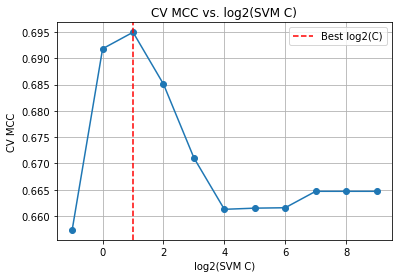

In [ ]:

log2C_values = range(-1, 10)
C_values = [2 ** i for i in log2C_values]
gamma = 0.125

log2C_list = []
mcc_list = []

random_state = 5445

for log2C in log2C_values:
    C = 2 ** log2C

    classifier = svm.SVC(C=C, gamma=gamma, class_weight={0: 1}, random_state=random_state)
    train_data_1_random = train_data_1.sample(frac=1, random_state=random_state)
    test_data_1_random = test_data_1.sample(frac=1, random_state=random_state)

    train_x = train_data_1_random.iloc[:, :columns_backward]
    train_y = train_data_1_random['y']
    test_x = test_data_1_random.iloc[:, :columns_backward]
    test_y = test_data_1_random['y']

    classifier.fit(train_x, train_y)
    y_pred = classifier.predict(test_x)
    mcc = metrics.matthews_corrcoef(test_y, y_pred)

    log2C_list.append(log2C)
    mcc_list.append(mcc)

# 执行交叉验证选择最佳C值
svm_parameters = {'C': C_values}
scorer = metrics.make_scorer(metrics.matthews_corrcoef, greater_is_better=True)
clf = GridSearchCV(classifier, svm_parameters, scoring=scorer, n_jobs=-1, cv=10)
clf.fit(train_x, train_y)

cv_mcc_list = clf.cv_results_['mean_test_score']

best_log2C = np.log2(clf.best_params_['C'])  # 获取最佳log2(C)值
best_mcc = clf.best_score_  # 获取最佳MCC值

plt.plot(log2C_list, cv_mcc_list, marker='o')
plt.axvline(x=best_log2C, color='r', linestyle='--', label='Best log2(C)')
plt.xlabel('log2(SVM C)')
plt.ylabel('CV MCC')
plt.title('CV MCC vs. log2(SVM C)')
plt.grid(True)
plt.legend()
plt.show()


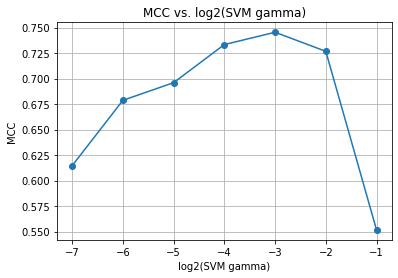

In [ ]:

# 设置log2(gamma)值范围和固定C值
log2gamma_values = range(-7,0)
gamma_values = [2 ** i for i in log2gamma_values]
C = 2

# 初始化存储log2(gamma)值和对应MCC的列表
log2gamma_list = []
mcc_list = []

random_state=100

# 遍历不同的log2(gamma)值
for log2gamma in log2gamma_values:
    gamma = 2 ** log2gamma  # 计算对应的gamma值

    # 创建SVM分类器对象
    classifier = svm.SVC(C=C, gamma=gamma,random_state=100)
    train_data_1_random = train_data_1.sample(frac=1, random_state=random_state)
    test_data_1_random = test_data_1.sample(frac=1, random_state=random_state)

    # 获取训练集和测试集数据
    train_x = train_data_1_random.iloc[:, :columns_backward]
    train_y = train_data_1_random['y']
    test_x = test_data_1_random.iloc[:, :columns_backward]
    test_y = test_data_1_random['y']

    # 使用训练集训练分类器
    classifier.fit(train_x, train_y)

    # 使用测试集进行预测
    y_pred = classifier.predict(test_x)

    # 计算MCC值
    mcc = metrics.matthews_corrcoef(test_y, y_pred)

    # 将log2(gamma)值和对应的MCC添加到列表中
    log2gamma_list.append(log2gamma)
    mcc_list.append(mcc)

# 绘制log2(gamma)值与MCC的关系图
plt.plot(log2gamma_list, mcc_list, marker='o')
plt.xlabel('log2(SVM gamma)')
plt.ylabel('MCC')
plt.title('MCC vs. log2(SVM gamma)')
plt.grid(True)
plt.show()


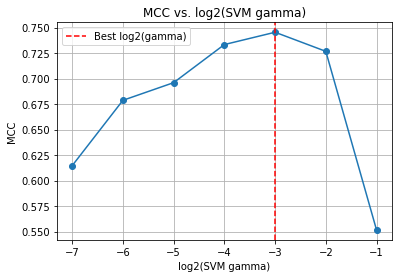

In [ ]:

# 设置log2(gamma)值范围和固定C值
log2gamma_values = range(-7,0)
gamma_values = [2 ** i for i in log2gamma_values]
C = 2

# 初始化存储log2(gamma)值和对应MCC的列表
log2gamma_list = []
mcc_list = []
random_state=100
# 遍历不同的log2(gamma)值
for log2gamma in log2gamma_values:
    gamma = 2 ** log2gamma  # 计算对应的gamma值

    # 创建SVM分类器对象
    classifier = svm.SVC(C=C, gamma=gamma, class_weight={0: 1},random_state=100)
    train_data_1_random = train_data_1.sample(frac=1, random_state=random_state)
    # 获取训练集和测试集数据
    train_x = train_data_1_random.iloc[:, :columns_backward]
    train_y = train_data_1_random['y']
    test_x = test_data_1_random.iloc[:, :columns_backward]
    test_y = test_data_1_random['y']

    # 使用训练集训练分类器
    classifier.fit(train_x, train_y)

    # 使用测试集进行预测
    y_pred = classifier.predict(test_x)

    # 计算MCC值
    mcc = metrics.matthews_corrcoef(test_y, y_pred)

    # 将log2(gamma)值和对应的MCC添加到列表中
    log2gamma_list.append(log2gamma)    
    mcc_list.append(mcc)

# 执行交叉验证选择最佳C值
svm_parameters = {'gamma': gamma_values}
scorer = metrics.make_scorer(metrics.matthews_corrcoef, greater_is_better=True)
clf = GridSearchCV(classifier, svm_parameters, scoring=scorer, n_jobs=-1, cv=10)
clf.fit(train_x, train_y)

best_log2gamma = np.log2(clf.best_params_['gamma'])  # 获取最佳log2(C)值
best_mcc = clf.best_score_  # 获取最佳MCC值

plt.plot(log2gamma_list, mcc_list, marker='o')
plt.axvline(x=best_log2gamma, color='r', linestyle='--', label='Best log2(gamma)')
plt.xlabel('log2(SVM gamma)')
plt.ylabel('MCC')
plt.title('MCC vs. log2(SVM gamma)')
plt.grid(True)
plt.legend()
plt.show()

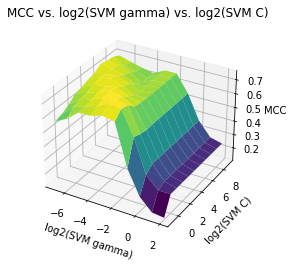

In [ ]:

log2C_values = range(-1, 10)
C_values = [2 ** i for i in log2C_values]
log2gamma_values = range(-7, 3)  # Adjust the range to have the same length as log2C_values
gamma_values = [2 ** i for i in log2gamma_values]

mcc_values = np.zeros((len(log2C_values), len(log2gamma_values)))

random_state = 100

for i, log2C in enumerate(log2C_values):
    C = 2 ** log2C

    for j, log2gamma in enumerate(log2gamma_values):
        gamma = 2 ** log2gamma

        classifier = svm.SVC(C=C, gamma=gamma, random_state=random_state)
        train_data_1_random = train_data_1.sample(frac=1, random_state=random_state)
        test_data_1_random = test_data_1.sample(frac=1, random_state=random_state)

        train_x = train_data_1_random.iloc[:, :columns_backward]
        train_y = train_data_1_random['y']
        test_x = test_data_1_random.iloc[:, :columns_backward]
        test_y = test_data_1_random['y']

        classifier.fit(train_x, train_y)
        y_pred = classifier.predict(test_x)
        mcc = metrics.matthews_corrcoef(test_y, y_pred)

        mcc_values[i, j] = mcc

# Create a meshgrid of coordinates
log2gamma_grid, log2C_grid = np.meshgrid(log2gamma_values, log2C_values)

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(log2gamma_grid, log2C_grid, mcc_values, cmap='viridis')

ax.set_xlabel('log2(SVM gamma)')
ax.set_ylabel('log2(SVM C)')
ax.set_zlabel('MCC')

plt.title('MCC vs. log2(SVM gamma) vs. log2(SVM C)')

plt.show()

In [ ]:
best_log2C,best_log2gamma

(1.0, -3.0)

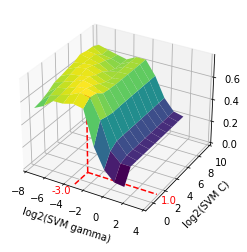

In [ ]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(log2gamma_grid, log2C_grid, mcc_values, cmap='viridis')
ax.scatter([best_log2gamma], [best_log2C], [best_mcc], color='r', marker='*', s=100, label='Best')
ax.set_xlabel('log2(SVM gamma)')
ax.set_ylabel('log2(SVM C)')
ax.set_xlim(-8, 4)
ax.set_ylim(-1, 10)
ax.set_zlim(0, None)
# 连接点到横纵坐标
ax.plot([best_log2gamma, best_log2gamma], [best_log2C, best_log2C], [0, best_mcc], color='r', linestyle='--')
ax.plot([best_log2gamma, best_log2gamma], [0, best_log2C], [best_mcc, best_mcc], color='r', linestyle='--')
ax.plot([best_log2gamma, best_log2gamma], [-1, best_log2C], [0,0], color='r', linestyle='--')
ax.plot([best_log2gamma,4], [best_log2C, best_log2C], [0,0], color='r', linestyle='--')
# 标记横纵坐标上的值
ax.text(best_log2gamma, -3, 0, f'{best_log2gamma}', color='r', ha='center', va='bottom')
ax.text(6, best_log2C, 0, f'{best_log2C}', color='r', ha='right', va='center')

plt.show()